<H1 style="background-color:#eb8f66;color:#1f5f7b;">PROJECT REPORT - Lisa Wagner</H1>

<H2 style="color:#1f5f7b;">GitHub URL:</H2>
<a href="https://github.com/WagnerLD/UCDPA_LisaWagner.git" target="_blank">Lisa's GitHub Repository for UCDPA Data Analytics Training Assignment</a></p>
(https://github.com/WagnerLD/UCDPA_LisaWagner.git)

<pre style="font-family:arial;">
</pre>
<h2 style="color:#1f5f7b;">Abstract</h2>
This project's purpose is to demonstrate a specific set of competencies learned in the UCDPA Fidelity International - Data Analytics Training course.  Given I had no prior experience in data science, coding (I knew Python to be a snake and Jupyter as the 5th planet from the sun) or statistics, the learning curve was steep.  As a result, I have chosen straightforward datasets, and in some cases individual datasets to demonstrate a lone competency.  The intention is to build a strong foundation, before moving on to more complex datasets and problems, including refining my code writing skills to be succinct and easier to understand.

<h2 style="color:#1f5f7b;">Introduction</h2>
The two main datasets used through the project are "Wine Quality" and "Data Science Salaries", both chosen as I find the topics interesting and could think of various problem statements to investigate in the data.

1. Wine Quality - the data is all numeric and had 11 features from which to predict the quality, this dataset was used for the Machine Learning competencies.
2. Data Science Salaries - originally I was interested in what salary ranges exist for various qualities (title, year of experience, employee location), but in the end, the dataset chosen was more suitable for importing and data cleaning competencies.
3. Other datasets:
    a. Stock prices - demonstrate use of API, data merging and presenting charts on financial data
    b. Tweets - demonstrate Regex to extract a pattern in data from text

<h2 style="color:#1f5f7b;">Datasets</h2>
Description and source for each data set used is below (also repeated at the beginning of the notebook section where the dataset is used)

<pre style="font-family:arial;">
1. Wine Quality
    Source: UCI Machine Learning Repository
    https://archive.ics.uci.edu/ml/datasets/Wine+Quality
    Reason for choosing:
        a. the website and dataset was suggested in more than search for "good datasets for beginners to learn Machine Learning"
        b. the website itself appeared safe and the data was explained
2. Data Science Salaries
    Source: Kaggle.com
    https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries?resource=download
    Reason for choosing:
        a. the website is well known for data sources
        b. the data itself was complete and appeared well organized (a good basis for a beginner)
3. Stock Prices
    Source: www.alphavantage.co
    https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=V&apikey=NLZ2TGZGULE9VS10
    Reason for choosing:
        a. website was used for demonstration during the course and I found it easy to use and understand the structure of the data retreived
4. Tweets
    Source: Kaggle.com
    https://www.kaggle.com/datasets/mmmarchetti/tweets-dataset
    Reason for chosing:
        a. search for tweets datasets returned Kaggle, data is clear and understandable
</pre>

<h2 style="color:#1f5f7b;">Implementation process</h2>
Please refer to descriptions within the notebook at each section
<h2 style="color:#1f5f7b;">Results</h2>
Please refer to descriptions within the notebook at each section

<h2 style="color:#1f5f7b;">Insights</h2>
Summarized below but can also be found within the workbook at the relevent sections:

<pre style="font-family:arial;">
1. Stock Prices - prices for a stock (Visa) were being compared to a benchmark (S&P500 Index), the result showed a deep, sharp decline
    in the stock part way through the time period.
    On further investigation, the stock went through a 4:1 split in the time frame the data was selected for.
    The resulting chart (based on the original data retrieved) is not suitable to answer the problem statement, the data for the stock
    price will need to be restated to normalize for the stock split.
2. Stock Prices - Once Visa's stock prices are restated to reflect the stock split, the chart more accurately shows Visa's performance
    compared to the benchmark (S&P500 Index).  Visa's performance was aligned to the Index until 2013 when Visa's growth was stronger than
    the general market.  Dips in Visa's stock price in latter years broadly correspond to dips in the Index; Visa's stock is not immune
    to outside conditions which impact other stocks in the Index.
3. Wine Quality - Ridge and Lasso regression models returned poor accuracy (mid-20%), which was anticipated as the attempt to predict quality
    is a Classification issue.  KNN Classifier model returned better accuracy than the Regression models, but still not good (at 45%)
    before adjusting for outliers, simplifying target values or optimizing # of neighbors
4. Wine Quality - Optimizing neighbors value to 25 returns a 70.4% accuracy - significantly improved from original model, but not considered
    a good result as model accuracy should exceed 90% to be considered useable.
5. Wine Quality - Further fine tuning of the model did not produce any better accuracy after optimizing neighbors to 25.
    a. Changing target values (original had a range of 3 - 9) to 0 or 1 (original quality value of <6 being "Not Good" = 0, >5 being "Good" = 1)
    b. Outliers made up 4% of the dataset.  Removing them improved the KNN Classifer model (before target values were transformed to 1 / 0)
       marginally from 45% to 48%.  As expected, removing outliers had little impact on accuracy after the target values were transformed 
</pre>

<h2 style="color:#1f5f7b;">References</h2><cite>
<pre style="font-family:arial;">
1. P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
   Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.
</pre></cite>

<h2 style="color:#1f5f7b;">Special Mention</h2>
<pre style="font-family:arial;">
Apprection to:
    1. Riju Sathyan for his assistance with making the API data useable
    2. Phillip Marsh for help with formatting text
</pre>

<H3 style="background-color:#f4c4af;color:#1f5f7b;">Data Science Salaries - importing data, data analysis and cleaning
</H3>

In [105]:
# Import data from csv, data analysis & cleaning (replace missing values, drop duplicates) using
# Data Science Salaries from Kaggle.com

In [106]:
# Import .csv file into a Pandas Dataframe

import pandas as pd
import numpy as np


In [107]:
# data source = Kaggle.com (https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries?resource=download)

df_sal = pd.read_csv('ds_salaries.csv')

In [108]:
# view what the data frame looks like - columns and beginning / ending data, confirm no missing data and check data format types

df_sal.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [109]:
df_sal.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [110]:
# confirms no missing info - count for each column is same value as RangeIndex entries

df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [111]:
# Data Cleaning - the index column is repeated in the first (unnamed) column, use drop based on index to remove the duplicate column
# creating df2 to retain original format of data

df_sal2 = df_sal.drop(df_sal.columns[0], axis=1)

In [112]:
df_sal2

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [113]:
# Data cleaning - replace missing values.  The original data did not having any missing values, so an amended file was
# created with some values missing to show the next competencies

# import amended file above to replace missing values

df_sal3 = pd.read_csv('ds_salaries_missing.csv')

In [114]:
df_sal3.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020.0,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020.0,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020.0,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020.0,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020.0,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [115]:
# shows missing data in column work_year - only 591 count, should be 607
# work_year has also been changed from integer to float during the process of creating missing data - will be ignored
# as the data frame is only being used to demonstrate data cleaning to replace missing data)

df_sal3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          607 non-null    int64  
 1   work_year           591 non-null    float64
 2   experience_level    607 non-null    object 
 3   employment_type     607 non-null    object 
 4   job_title           607 non-null    object 
 5   salary              607 non-null    int64  
 6   salary_currency     607 non-null    object 
 7   salary_in_usd       607 non-null    int64  
 8   employee_residence  607 non-null    object 
 9   remote_ratio        607 non-null    int64  
 10  company_location    607 non-null    object 
 11  company_size        607 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 57.0+ KB


In [116]:
# same as above, more explicitly shows the exact number of missing values in the one column "work_year"

df_sal3.isna().sum()

Unnamed: 0             0
work_year             16
experience_level       0
employment_type        0
job_title              0
salary                 0
salary_currency        0
salary_in_usd          0
employee_residence     0
remote_ratio           0
company_location       0
company_size           0
dtype: int64

In [117]:
# missing data is in the year column, for which same years are grouped together - use previous value to populate missing cells

df_sal_cleaned=df_sal3.fillna(method="ffill")

In [118]:
# rechecking, no more missing data

df_sal_cleaned.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

<H3 style="background-color:#f4c4af;color:#1f5f7b;">Stock Prices - importing data via API, dataframe merging and charts
</H3>

In [119]:
# Import data via API, merge dataframe, iterator, dictionaries/lists) and 
# visualization using stock data for Visa vs a benchmark (S&P 500 Index ETF)

In [120]:
# data set source = https://www.alphavantage.co/documentation/ with ticker symbol V selected for VISA
# a stock for which I will compare performance against a general market benchmark (S&P 500 Index ETF)

import requests

dataV = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=V&apikey=NLZ2TGZGULE9VS10")

In [121]:
dataV = dataV.json()

In [122]:
# view the format and structure of the data

dataV

{'Meta Data': {'1. Information': 'Monthly Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'V',
  '3. Last Refreshed': '2022-09-16',
  '4. Time Zone': 'US/Eastern'},
 'Monthly Time Series': {'2022-09-16': {'1. open': '198.7200',
   '2. high': '207.1900',
   '3. low': '188.2200',
   '4. close': '193.3000',
   '5. volume': '57174925'},
  '2022-08-31': {'1. open': '208.4500',
   '2. high': '217.6100',
   '3. low': '198.6400',
   '4. close': '198.7100',
   '5. volume': '130178837'},
  '2022-07-29': {'1. open': '196.7900',
   '2. high': '218.0700',
   '3. low': '194.1400',
   '4. close': '212.1100',
   '5. volume': '118596952'},
  '2022-06-30': {'1. open': '212.0500',
   '2. high': '217.5800',
   '3. low': '185.9100',
   '4. close': '196.8900',
   '5. volume': '128123527'},
  '2022-05-31': {'1. open': '211.7700',
   '2. high': '214.8000',
   '3. low': '189.9500',
   '4. close': '212.1700',
   '5. volume': '171858850'},
  '2022-04-29': {'1. open': '223.0800',
   '2. high': '229.2

In [123]:
# isolate the data excluding the Metadata

dataV['Monthly Time Series']

{'2022-09-16': {'1. open': '198.7200',
  '2. high': '207.1900',
  '3. low': '188.2200',
  '4. close': '193.3000',
  '5. volume': '57174925'},
 '2022-08-31': {'1. open': '208.4500',
  '2. high': '217.6100',
  '3. low': '198.6400',
  '4. close': '198.7100',
  '5. volume': '130178837'},
 '2022-07-29': {'1. open': '196.7900',
  '2. high': '218.0700',
  '3. low': '194.1400',
  '4. close': '212.1100',
  '5. volume': '118596952'},
 '2022-06-30': {'1. open': '212.0500',
  '2. high': '217.5800',
  '3. low': '185.9100',
  '4. close': '196.8900',
  '5. volume': '128123527'},
 '2022-05-31': {'1. open': '211.7700',
  '2. high': '214.8000',
  '3. low': '189.9500',
  '4. close': '212.1700',
  '5. volume': '171858850'},
 '2022-04-29': {'1. open': '223.0800',
  '2. high': '229.2400',
  '3. low': '201.1000',
  '4. close': '213.1300',
  '5. volume': '151474586'},
 '2022-03-31': {'1. open': '214.4800',
  '2. high': '228.8100',
  '3. low': '186.6700',
  '4. close': '221.7700',
  '5. volume': '188732371'},


In [124]:
# create static shortcut for stock symbol from Meta Data for future use and test it returns expected value

mts_visa = dataV['Meta Data']['2. Symbol']

In [125]:
mts_visa

'V'

In [126]:
# extract only the required data from the entirety brought in from the website:
# - create lists for the 3 needed items (name, date and price)
# - run a loop to take data from dataV (created above) and extract the price at each date, populating the stock symbol created
#   above  (with appreciation to Riju Sathyan for the assistance in getting this code to work so succinctly)

from datetime import datetime

stock_nameV=[]
date_stampV=[]
close_priceV=[]

for x,y in dataV['Monthly Time Series'].items():
    stock_nameV.append(mts_visa)
    date_stampV.append(datetime.strptime(x, '%Y-%m-%d'))
    close_priceV.append(float(y['4. close']))

In [127]:
# combine the lists, adding column headers, to then create the dataframe

dataV_pd = {"date_stamp": date_stampV, "ticker": stock_nameV, "close_price": close_priceV}

In [128]:
df_mtsV=pd.DataFrame(dataV_pd)

In [129]:
df_mtsV

,date_stamp,ticker,close_price
0,2022-09-16,V,193.30
1,2022-08-31,V,198.71
2,2022-07-29,V,212.11
3,2022-06-30,V,196.89
4,2022-05-31,V,212.17
...,...,...,...
169,2008-08-29,V,75.90
170,2008-07-31,V,73.06
171,2008-06-30,V,81.31
172,2008-05-30,V,86.36


In [130]:
# Repeat the above process to take S&P500 Index prices from www.alphavantage.co to merge with the df_mtsV
# Additional cleaning step needed to drop additional rows so the chart starts at the same date as df_mtsV 

# data set source = https://www.alphavantage.co/documentation/ with ticker symbol IVV selected for S&P Index 500 Index ETF
# as a benchmark for the general market
dataIVV = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=IVV&apikey=NLZ2TGZGULE9VS10")

In [131]:
dataIVV = dataIVV.json()

In [132]:
dataIVV

{'Meta Data': {'1. Information': 'Monthly Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'IVV',
  '3. Last Refreshed': '2022-09-16',
  '4. Time Zone': 'US/Eastern'},
 'Monthly Time Series': {'2022-09-16': {'1. open': '394.9000',
   '2. high': '413.9400',
   '3. low': '385.6900',
   '4. close': '389.1000',
   '5. volume': '48649568'},
  '2022-08-31': {'1. open': '411.3400',
   '2. high': '434.0299',
   '3. low': '397.0900',
   '4. close': '397.1800',
   '5. volume': '93399466'},
  '2022-07-29': {'1. open': '378.5200',
   '2. high': '415.2000',
   '3. low': '372.9700',
   '4. close': '414.2800',
   '5. volume': '95301237'},
  '2022-06-30': {'1. open': '416.9900',
   '2. high': '419.2900',
   '3. low': '364.0300',
   '4. close': '379.1500',
   '5. volume': '146298953'},
  '2022-05-31': {'1. open': '413.6200',
   '2. high': '431.5000',
   '3. low': '382.1700',
   '4. close': '414.8700',
   '5. volume': '148309359'},
  '2022-04-29': {'1. open': '455.2600',
   '2. high': '459.7

In [133]:
dataIVV['Monthly Time Series']

{'2022-09-16': {'1. open': '394.9000',
  '2. high': '413.9400',
  '3. low': '385.6900',
  '4. close': '389.1000',
  '5. volume': '48649568'},
 '2022-08-31': {'1. open': '411.3400',
  '2. high': '434.0299',
  '3. low': '397.0900',
  '4. close': '397.1800',
  '5. volume': '93399466'},
 '2022-07-29': {'1. open': '378.5200',
  '2. high': '415.2000',
  '3. low': '372.9700',
  '4. close': '414.2800',
  '5. volume': '95301237'},
 '2022-06-30': {'1. open': '416.9900',
  '2. high': '419.2900',
  '3. low': '364.0300',
  '4. close': '379.1500',
  '5. volume': '146298953'},
 '2022-05-31': {'1. open': '413.6200',
  '2. high': '431.5000',
  '3. low': '382.1700',
  '4. close': '414.8700',
  '5. volume': '148309359'},
 '2022-04-29': {'1. open': '455.2600',
  '2. high': '459.7900',
  '3. low': '412.9800',
  '4. close': '413.5600',
  '5. volume': '120564640'},
 '2022-03-31': {'1. open': '437.0000',
  '2. high': '464.0500',
  '3. low': '416.9100',
  '4. close': '453.6900',
  '5. volume': '177475497'},
 '

In [134]:
mts_sp500etf = dataIVV['Meta Data']['2. Symbol']

In [135]:
mts_sp500etf

'IVV'

In [136]:
stock_nameIVV=[]
date_stampIVV=[]
close_priceIVV=[]

for x,y in dataIVV['Monthly Time Series'].items():
    stock_nameIVV.append(mts_sp500etf)
    date_stampIVV.append(datetime.strptime(x, '%Y-%m-%d'))
    close_priceIVV.append(float(y['4. close']))

In [137]:
dataIVV_pd = {"date_stamp": date_stampIVV,"ticker": stock_nameIVV, "close_price": close_priceIVV}

In [138]:
df_mtsIVV=pd.DataFrame(dataIVV_pd)

In [139]:
# remove rows from df_mtsIVV for data prior to earliest date in df_mtsV for chart vizualization
# (so that both time series are same length)

df_mtsIVV.drop(df_mtsIVV.index[174:268],0,inplace=True)

C:\Users\Lisa Wagner\AppData\Local\Temp\ipykernel_29292\3245525353.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_mtsIVV.drop(df_mtsIVV.index[174:268],0,inplace=True)


In [140]:
df_mtsIVV

,date_stamp,ticker,close_price
0,2022-09-16,IVV,389.10
1,2022-08-31,IVV,397.18
2,2022-07-29,IVV,414.28
3,2022-06-30,IVV,379.15
4,2022-05-31,IVV,414.87
...,...,...,...
169,2008-08-29,IVV,128.94
170,2008-07-31,IVV,127.05
171,2008-06-30,IVV,128.00
172,2008-05-30,IVV,140.39


In [141]:
# check dataframes have same columns

df_mtsV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_stamp   174 non-null    datetime64[ns]
 1   ticker       174 non-null    object        
 2   close_price  174 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.2+ KB


In [142]:
df_mtsIVV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_stamp   174 non-null    datetime64[ns]
 1   ticker       174 non-null    object        
 2   close_price  174 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.2+ KB


In [143]:
#merge data frame based on date so prices of each stock (including ticker symbol) are combined on same row based on date

pd.merge(df_mtsV,df_mtsIVV, on="date_stamp", how = "inner")

,date_stamp,ticker_x,close_price_x,ticker_y,close_price_y
0,2022-09-16,V,193.30,IVV,389.10
1,2022-08-31,V,198.71,IVV,397.18
2,2022-07-29,V,212.11,IVV,414.28
3,2022-06-30,V,196.89,IVV,379.15
4,2022-05-31,V,212.17,IVV,414.87
...,...,...,...,...,...
169,2008-08-29,V,75.90,IVV,128.94
170,2008-07-31,V,73.06,IVV,127.05
171,2008-06-30,V,81.31,IVV,128.00
172,2008-05-30,V,86.36,IVV,140.39


In [144]:
import matplotlib.pyplot as plt
import numpy as np

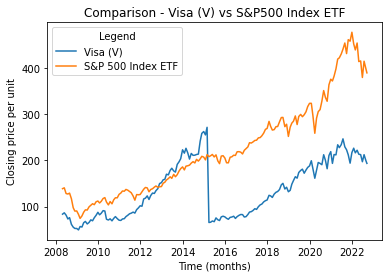

In [145]:
fig, ax = plt.subplots()

ax.plot(df_mtsV["date_stamp"],df_mtsV["close_price"], label = 'Visa (V)')
ax.plot(df_mtsIVV["date_stamp"],df_mtsIVV["close_price"], label = 'S&P 500 Index ETF')
ax.set_xlabel("Time (months)")
ax.set_ylabel("Closing price per unit")
ax.set_title("Comparison - Visa (V) vs S&P500 Index ETF")

ax.legend(title = 'Legend',loc = 'upper left')

plt.show()

In [146]:
# At first glance, the chart above appears to show Visa's price crashed around 2015.  A review of corporate actions shows 
# a 4 for 1 Stock Split in March 2015.  In order for the chart to show the relationship between movement in the two prices 
# accurately, Visa stock prices will need to be restated to normalize the price across the whole time frame of the chart

In [147]:
# Restate prices post stock split - extract post stock split prices, apply factor of 4, then concatenate with pre-stock split
# prices to form new df with prices restated.  Inelegant and likely more code than needed but was unable to find workable code
# that restated only those prices post the stock split date - but it works in the end!

# removing rows for dates pre-stock split

df_postss = df_mtsV.loc[~df_mtsV['date_stamp'].isin(pd.date_range(start='20080430', end='20150228'))].copy()

In [148]:
df_postss

,date_stamp,ticker,close_price
0,2022-09-16,V,193.30
1,2022-08-31,V,198.71
2,2022-07-29,V,212.11
3,2022-06-30,V,196.89
4,2022-05-31,V,212.17
...,...,...,...
86,2015-07-31,V,75.34
87,2015-06-30,V,67.15
88,2015-05-29,V,68.68
89,2015-04-30,V,66.05


In [149]:
#  restate stock prices post stock split based on 4:1 split factor

df_postss.loc[:,'close_price'] *= 4

In [150]:
df_postss

,date_stamp,ticker,close_price
0,2022-09-16,V,773.20
1,2022-08-31,V,794.84
2,2022-07-29,V,848.44
3,2022-06-30,V,787.56
4,2022-05-31,V,848.68
...,...,...,...
86,2015-07-31,V,301.36
87,2015-06-30,V,268.60
88,2015-05-29,V,274.72
89,2015-04-30,V,264.20


In [151]:
# extract stock prices pre-stock split (remain unchanged)

df_press=df_mtsV[~df_mtsV['date_stamp'].isin(pd.date_range(start='20150331', end='20220916'))]

In [152]:
df_press

,date_stamp,ticker,close_price
91,2015-02-27,V,271.31
92,2015-01-30,V,254.91
93,2014-12-31,V,262.20
94,2014-11-28,V,258.19
95,2014-10-31,V,241.43
...,...,...,...
169,2008-08-29,V,75.90
170,2008-07-31,V,73.06
171,2008-06-30,V,81.31
172,2008-05-30,V,86.36


In [153]:
# merge restated stock prices with pre-stock split (unchanged) prices

frames = [df_postss, df_press]
  
df_mtsV_rs = pd.concat(frames)
display(df_mtsV_rs)

,date_stamp,ticker,close_price
0,2022-09-16,V,773.20
1,2022-08-31,V,794.84
2,2022-07-29,V,848.44
3,2022-06-30,V,787.56
4,2022-05-31,V,848.68
...,...,...,...
169,2008-08-29,V,75.90
170,2008-07-31,V,73.06
171,2008-06-30,V,81.31
172,2008-05-30,V,86.36


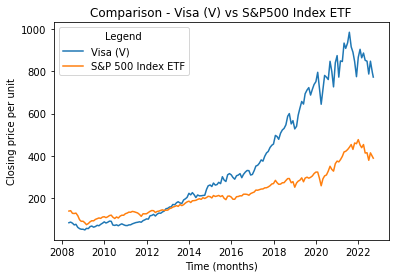

In [154]:
# Rerun chart comparing V and S&P500 Index with V prices restated post March 2015 stock split

fig, ax = plt.subplots()

ax.plot(df_mtsV_rs["date_stamp"],df_mtsV_rs["close_price"], label = 'Visa (V)')
ax.plot(df_mtsIVV["date_stamp"],df_mtsIVV["close_price"], label = 'S&P 500 Index ETF')
ax.set_xlabel("Time (months)")
ax.set_ylabel("Closing price per unit")
ax.set_title("Comparison - Visa (V) vs S&P500 Index ETF")

ax.legend(title = 'Legend',loc = 'upper left')

plt.show()

In [155]:
# Restated chart shows Visa's performance was aligned with the S&P500 Index until 2013 when it's growth outstripped the Index's
# Visa's stock price has grown faster since 2013, but also has followed the general peaks and crashes as the S&P 500
# This shows that Visa has been a generally better performing stock than most stocks in the S&P500 Index, but is not immune
# to the same factors which cause price declines in the general market

<H3 style="background-color:#f4c4af;color:#1f5f7b;">Tweets - Regex to extract pattern in data
</H3>

In [156]:
# Import dataset from Kaggle.com (https://www.kaggle.com/datasets/mmmarchetti/tweets-dataset)

import re

df = pd.read_csv('tweets.csv')

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52542 entries, 0 to 52541
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   author            52542 non-null  object 
 1   content           52542 non-null  object 
 2   country           36 non-null     object 
 3   date_time         52542 non-null  object 
 4   id                52542 non-null  float64
 5   language          52542 non-null  object 
 6   latitude          1 non-null      float64
 7   longitude         1 non-null      float64
 8   number_of_likes   52542 non-null  int64  
 9   number_of_shares  52542 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 4.0+ MB


In [158]:
# Find all instances of "learning" in the "contents" column, irrespective of upper/lower case - run the output as "results"

results = df['content'].str.contains(r'learning', flags=re.IGNORECASE, regex=True, na=False)

print(df[results])

             author                                            content  \
942       katyperry  SHAME on schools that allow students to have t...   
1559      katyperry  YO! Impress all ur homies &amp; stay straight ...   
11347       rihanna                      Learning how to be selfish...   
13273       YouTube  Learning begins with listening. \r\n\r\nFirst-...   
13955       YouTube  Learning about black holes while blindfolded w...   
16747      ladygaga  Learning lines, writing songs, rolling around ...   
21940       Twitter  We’ve acquired Magic Pony Technology to enhanc...   
22209       Twitter  @avneeshk91 Keep learning and growing, Avneesh...   
22555       Twitter  Yesterday we opened the @NeighborNest, our loc...   
23086       Twitter  That's great! “@melissacrnic: @twitter #ladies...   
23476       Twitter  Had the pleasure of learning what Bollywood th...   
32410     Cristiano  You asked: Hi Cristiano! You are my idol and i...   
34038     Cristiano  You and @Ochocinc

<H3 style="background-color:#f4c4af;color:#1f5f7b;">Wine Quality - Machine Learning
</H3>

<pre style="font-family:arial;">
Wine Quality - Predict wine quality based on the chemical attributes (features) for each wine and test against quality (target) assigned to the wine.
</pre>

In [159]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 

In [160]:
# data source = UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

df_wine = pd.read_csv('winequality-white.csv')

In [161]:
# view what the data frame looks like - columns and beginning / ending data, confirm no missing data and check data format types

df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [162]:
df_wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [163]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [164]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [165]:
# count of all results in the target (quality)

count = df_wine['quality'].value_counts(ascending=False)
countd = count.to_dict()
df_count = pd.DataFrame(list(countd.items()),columns = ['quality score','count']) 
print(df_count)

   quality score  count
0              6   2198
1              5   1457
2              7    880
3              8    175
4              4    163
5              3     20
6              9      5


In [166]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   quality score  7 non-null      int64
 1   count          7 non-null      int64
dtypes: int64(2)
memory usage: 240.0 bytes


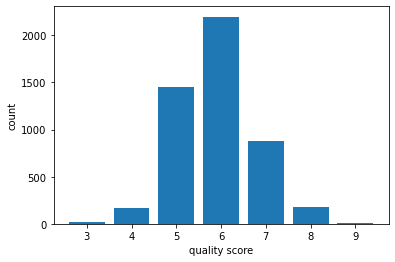

In [167]:
# show the count of quality variables - consider to split quality into two buckets being: 
# lower (5 and below - 35%) and higher (6 and above - 65%) 
# the bar chart also implies outliers in both lower (quality = 3,4) and upper (8,9) ranges

plt.bar(df_count['quality score'], df_count['count'])
plt.xlabel("quality score")
plt.ylabel("count")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality'>

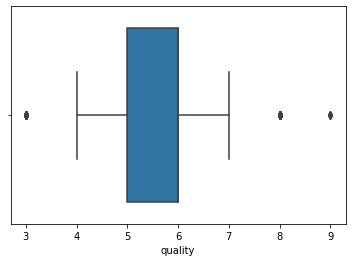

In [168]:
# use Box Plot to identify outliers - quality values 3, 8 and 9 are acting as outliers, as implied above

import seaborn as sns

sns.boxplot(df_wine['quality'])

In [169]:
# import train_test_split as need to split the data into a training and a test set to check the machine learning model's accuracy

from sklearn.model_selection import train_test_split

In [170]:
# assign feature and target arrays for the model, check type is numpy

X = df_wine.drop("quality", axis=1).values
y = df_wine["quality"].values
names = df_wine.drop("quality", axis=1).columns
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [171]:
# check shape - y (target) can be 1 dimensional, but X (features) must be two dimensional array for regression model to work

print(y.shape, X.shape)

(4898,) (4898, 11)


In [172]:
# create the train and test data sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(type(X_train), type(y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [173]:
# Model #1 - Ridge Regression
# scores show this model is not a good fit for the data;
# score does not material change as the alpha is varied, implies tuning not likely to improve score in this model

alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.253882033094209, 0.2537816239676387, 0.25355183350458244, 0.23366235986958594, 0.21055971854463496, 0.1318418298130537]


In [174]:
# Model #2 - Lasso Regression
# scores show this model is also not a good fit for the data, also progressively worse as alpha is varied

# Lasso Regression module

scores = []

for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    lasso_pred=lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print(scores)

[0.24492793942460256, 0.04739580078497285, -0.0011619661806652193, -0.0011619661806652193, -0.0011619661806652193]


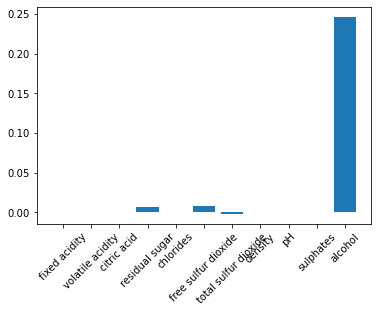

In [175]:
# use Lasso to check which (if any) feature(s) have more of an impact in predicting high quality - in this data, alcohol is the
#  single best predictor of quality, none of the remaining features predict quality at any measurable level.

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

In [176]:
# running a simple correlation on the data is another data focused method to present same info in the above chart

df_wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


<pre style="font-family:arial;">
<b>Initial review of model accuracy</b><hr></hr>
Originally, I wondered if regression models might work better given the multiple values in the target column, but ultimately this is really a classification problem.
Out of curiosity, I ran the regression models first to see their accuracy (or lack thereof), result being the regression models were not accurate.

From that (and presented below), applied KNN Classifier model, optimized the neighbors value and compared results of further fine-tuning to:
1. Remove Outliers
2. Simplify target values from original options of 3 - 9 to 1 or 0:
    a. Good (6 and above)
    b. Not Good (5 and below)

Results were:
    a - KNN on original data with a randomly selected neighbors value of 6 = 44.9% (not great)
    b - KNN on original data with optimized neighbors of 25 = 47.6% (marginally improved)
    c - KNN on simplified data with optimized neighbors of 25 = 70.4% (significantly improved but still not accurate enough)
    d - KNN on original data with optimized neighbors of 25 and outliers removed = 47.3% (worse in absolute %, but statistically same as version b)
    e - KNN on simplified data with optimized neighbors of 25 and outliers removed = 70.4% (outliers removed from simplied data had no impact on accuracy)
</pre>

In [177]:
# APPLY KNN CLASSIFIER MODEL

# Model #3 (original) - run Classifier Model before removing outliers and changing target (quality) to only two options 
# in order to see impact of optimization and fine-tuning

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

In [178]:
# Fit the classifier to the data, predict the labels for X and print 

knn.fit(X, y)
y_pred = knn.predict(X)
print("Predictions: {}".format(y_pred)) 

Predictions: [6 5 6 ... 6 6 6]


In [179]:
# Fit the classifier to the training data and print accuracy
# Accuracy is not great at 46%

knn.fit(X_train,y_train)
print(knn.score(X_test, y_test))

0.4489795918367347


In [180]:
# Check Model complexity and find optimal knn neighbor value

neighbors = np.arange(1, 30)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] 
 {1: 1.0, 2: 0.7852975495915986, 3: 0.7170361726954493, 4: 0.6566511085180864, 5: 0.6376896149358227, 6: 0.6117269544924154, 7: 0.5962660443407235, 8: 0.5869311551925321, 9: 0.5793465577596266, 10: 0.5703033838973163, 11: 0.5694282380396732, 12: 0.5574679113185531, 13: 0.5475495915985997, 14: 0.5420070011668612, 15: 0.5379229871645275, 16: 0.5323803967327888, 17: 0.5282963827304551, 18: 0.5245040840140023, 19: 0.5183780630105017, 20: 0.5157526254375729, 21: 0.5134189031505251, 22: 0.514585764294049, 23: 0.5105017502917153, 24: 0.5075845974329055, 25: 0.5075845974329055, 26: 0.5084597432905484, 27: 0.5078763127187864, 28: 0.5052508751458576, 29: 0.5067094515752626} 
 {1: 0.5591836734693878, 2: 0.5047619047619047, 3: 0.47891156462585033, 4: 0.47278911564625853, 5: 0.47551020408163264, 6: 0.4489795918367347, 7: 0.45850340136054424, 8: 0.4564625850340136, 9: 0.4564625850340136, 10: 0.4408163265306122

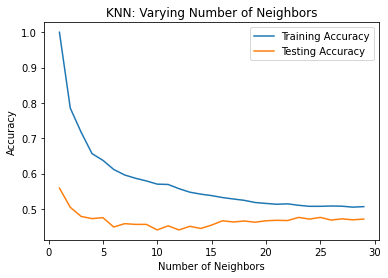

In [181]:
# plot the results on a chart to visualize where optimal # of neighbors is - appears around 25

plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [182]:
# Model #3 KNN (optimalN) - re run Classifier Model using optimal neighbors value of 25

knn = KNeighborsClassifier(n_neighbors=25)

In [183]:
knn.fit(X, y)
y_pred = knn.predict(X)
print("Predictions: {}".format(y_pred)) 

Predictions: [6 5 6 ... 6 6 6]


In [184]:
# rerunning the model improves marginally to 47.6% from 44.9%

knn.fit(X_train,y_train)
print(knn.score(X_test, y_test))

0.47619047619047616


In [185]:
# Rerun Model #3 KNN (simplify) - Simplify the target values to reflect:
#     1.  <6 as 0 (being Not Good); and
#     2.  >5 as 1 (being Good)

df_wine2 = df_wine.replace({'quality':{3:0, 4:0, 5:0, 6:1, 7:1, 8:1, 9:1}})
df_wine2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [186]:
# Check that all target values are either 1 or 0 - confirmed

count2 = df_wine2['quality'].value_counts(ascending=False)
countd2 = count2.to_dict()
df_count2 = pd.DataFrame(list(countd2.items()),columns = ['quality score','count']) 
print(df_count2)

   quality score  count
0              1   3258
1              0   1640


In [187]:
#RERUN MODEL #3 AFTER TARGET VALUES CHANGED TO 1/0

# Revise feature and target arrays for the model, check type is numpy

X2 = df_wine2.drop("quality", axis=1).values
y2 = df_wine2["quality"].values
names = df_wine2.drop("quality", axis=1).columns
print(type(X2), type(y2))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [188]:
# Revise the train and test data sets

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

print(type(X2_train), type(y2_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [189]:
# Fit the classifier to the new data, predict the labels and print

knn.fit(X2, y2)
y2_pred = knn.predict(X2)
print("Predictions: {}".format(y2_pred)) 

Predictions: [1 0 1 ... 1 1 1]


In [190]:
# Fit the classifier to the revised training data
# Print the accuracy of the model after the target values are simplified
# Accuracy has improved, but it is still not high enough (would expect 90% or higher)

#Score for Model #3 KNN (simplify) (simplified with optimal neighbors of 25) is 70.4%

knn.fit(X2_train,y2_train)
print(knn.score(X2_test, y2_test))

0.7040816326530612


In [191]:
# RERUN MODEL #3 KNN(ex-outliers) REVISED FOR OUTLIERS
# Identify and drop outliers using IQR method (interquartile range), then revise all steps to run the model

df_wine3 = df_wine

# IQR
Q1 = np.percentile(df_wine3['quality'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_wine3['quality'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df_wine.shape)
 
# Upper bound
upper = np.where(df_wine3['quality'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_wine3['quality'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df_wine3.drop(upper[0], inplace = True)
df_wine3.drop(lower[0], inplace = True)
 
print("New Shape: ", df_wine3.shape)

Old Shape:  (4898, 12)
New Shape:  (4698, 12)


In [192]:
df_wine3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4698 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4698 non-null   float64
 1   volatile acidity      4698 non-null   float64
 2   citric acid           4698 non-null   float64
 3   residual sugar        4698 non-null   float64
 4   chlorides             4698 non-null   float64
 5   free sulfur dioxide   4698 non-null   float64
 6   total sulfur dioxide  4698 non-null   float64
 7   density               4698 non-null   float64
 8   pH                    4698 non-null   float64
 9   sulphates             4698 non-null   float64
 10  alcohol               4698 non-null   float64
 11  quality               4698 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 477.1 KB


In [193]:
X3 = df_wine3.drop("quality", axis=1).values
y3 = df_wine3["quality"].values
names = df_wine3.drop("quality", axis=1).columns
print(type(X3), type(y3))
print(y3.shape, X3.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(4698,) (4698, 11)


In [194]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)
print(type(X3_train), type(y3_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [195]:
# ACCURACY OF MODEL #3 AFTER OUTLIERS DROPPED - DECREASES FROM 47.6% TO 47.3% WHEN USING UPDATED NEIGHBORS (25)

#Score for Model #3 KNN(ex-outliers) (not simplified, outliers removed, optimal neighbors of 25) is 47.3%

knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X3, y3)
y3_pred = knn.predict(X3)
print("Predictions: {}".format(y3_pred))
knn.fit(X3_train,y3_train)
print(knn.score(X3_test, y3_test))

Predictions: [6 5 6 ... 6 6 6]
0.47304964539007094


In [196]:
# MODEL #3 KNN(simplified + ex-outliers) REVISED FURTHER FOR:
# Drop outliers and then transform target values to 1/0 - revise all steps
# this version is not expected to change the overall accuracy as what was previously considered an outlier is changed to 1 or 0
# and the volume of outliers are 200 ~ 4% of the original dataset

df_wine4 = df_wine

# IQR
Q1 = np.percentile(df_wine4['quality'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_wine4['quality'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df_wine.shape)
 
# Upper bound
upper = np.where(df_wine4['quality'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_wine4['quality'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df_wine4.drop(upper[0], inplace = True)
df_wine4.drop(lower[0], inplace = True)
 
print("New Shape: ", df_wine4.shape)

Old Shape:  (4698, 12)
New Shape:  (4698, 12)


In [197]:
df_wine4 = df_wine4.replace({'quality':{3:0, 4:0, 5:0, 6:1, 7:1, 8:1, 9:1}})
df_wine4.info()
count4 = df_wine4['quality'].value_counts(ascending=False)
countd4 = count4.to_dict()
df_count4 = pd.DataFrame(list(countd4.items()),columns = ['quality score','count']) 
print(df_count4)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4698 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4698 non-null   float64
 1   volatile acidity      4698 non-null   float64
 2   citric acid           4698 non-null   float64
 3   residual sugar        4698 non-null   float64
 4   chlorides             4698 non-null   float64
 5   free sulfur dioxide   4698 non-null   float64
 6   total sulfur dioxide  4698 non-null   float64
 7   density               4698 non-null   float64
 8   pH                    4698 non-null   float64
 9   sulphates             4698 non-null   float64
 10  alcohol               4698 non-null   float64
 11  quality               4698 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 477.1 KB
   quality score  count
0              1   3078
1              0   1620


In [198]:
X4 = df_wine4.drop("quality", axis=1).values
y4 = df_wine4["quality"].values
names = df_wine4.drop("quality", axis=1).columns
print(type(X4), type(y4))
print(y4.shape, X4.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(4698,) (4698, 11)


In [199]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=42)
print(type(X4_train), type(y4_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [200]:
# ACCURACY OF MODEL #3 AFTER TARGET SIMPLIFIED AND OUTLIERS DROPPED - NO CHANGE FROM Model #3 KNN (simplify) OF 70.4%
# Removing outliers from the dataset once target values simplied had no effect on the model accuracy

knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X2, y2)
y2_pred = knn.predict(X)
print("Predictions: {}".format(y2_pred))
knn.fit(X2_train,y2_train)
print(knn.score(X2_test, y2_test))

Predictions: [1 0 1 ... 1 1 1]
0.7040816326530612


<p style="color:#1f5f7b;font-size:25px;"><b><i> THE END </b></i></p>
